## Introduction

Within the realm of Natural Language Processing (NLP), I undertook a project centered around text classification. The primary objective was to construct a robust and versatile model capable of discerning tweets that pertained to genuine disasters from those that did not.

The project comprised a systematic exploration of four distinct model architectures, each designed to address the unique challenges associated with text classification:

1. A foundational model was established, featuring essential components such as vectorization and embedding layers, complemented by a hidden feed-forward layer.

2. Building upon this foundation, a more intricate model was created. It incorporated vectorization and embedding layers, along with a global max-pooling layer. This addition enhanced the system's ability to efficiently extract vital information from textual data.

3. The project also involved the implementation of a Bidirectional Long Short-Term Memory (LSTM) model, exploring various directional merge modes. This approach allowed the model to capture complex linguistic dependencies and temporal patterns in the tweets.

4. In keeping with the latest advances in the field, a pre-trained transformer model called 'DIstilBERT' was introduced. This model harnessed the power of transfer learning to enhance the system's ability to understand and interpret nuanced language.

By conducting a thorough and systematic analysis of these models, I aimed to determine the most effective approach for this particular text classification challenge.

## Data Description

The datasets provided for this project, comprising 'train.csv' and 'test.csv,' encompass five key columns, each holding vital information:

1. `id`: A unique identifier assigned to each tweet, ensuring data integrity and traceability.

2. `keyword`: This column captures specific keywords or phrases extracted from the tweets, although it may be left blank in some instances.

3. `location`: Offers insights into the geographical origin of the tweet, when available; however, it may also contain blank entries.

4. `text`: The 'text' column constitutes the heart of the dataset, containing the actual textual content of each tweet, essential for the model to make accurate classifications.

5. `target`: Denoted by binary values, 'target' serves as the target variable for this classification task. A value of '1' signifies that the tweet pertains to a real disaster, while a value of '0' indicates that it does not.

In [ ]:
pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00


## 1. Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import datasets
import transformers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense, Bidirectional, GlobalAveragePooling1D, Dropout
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification

# Import the required libraries
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Import WordCloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
tweets = pd.read_csv("train.csv")

In [ ]:
# Print first five rows
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Print last few rows
tweets.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
# Print shape of the dataset
print(tweets.shape, "\n")

# Print information about the dataset
print(tweets.info(), "\n")

# Check for missing values in each column
missing_values = tweets.isna().any()
print(missing_values, "\n")

# Print the unique values of each column
print(tweets.nunique())

(7613, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None 

id          False
keyword      True
location     True
text        False
target      False
dtype: bool 

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64


## 2. Data Pre-processing and Exploration

In this section, I will execute a sequence of essential data exploration and pre-processing procedures, which include:

1. **Column Selection:** Identifying and discarding columns that do not contribute to the modeling process, thereby optimizing data relevance and model efficiency.

2. **Target Variable Analysis:** Analyzing the distribution of the target variable to discern whether, on average, tweets tend to signify real disasters or not.

3. **Data Visualization:** Employing a countplot to visually represent the distribution of the target variable, accompanied by an appropriate title for the plot to enhance clarity.

This phase will serve as the foundational step in shaping the dataset for subsequent modeling tasks and gaining a preliminary understanding of the data's characteristics.

### Drop Columns that are not useful for Modeling

We can see that there are two columns (keyword and location) that have missing values. Fortunately, we do not need those columns. We only need the text and label (target) for the classification model. Therefore, we can drop the rest.

In [ ]:
tweets_train = tweets[["text", "target"]]
tweets_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Print the distrbution
print(tweets_train['target'].describe())

count    7613.00000
mean        0.42966
std         0.49506
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: target, dtype: float64


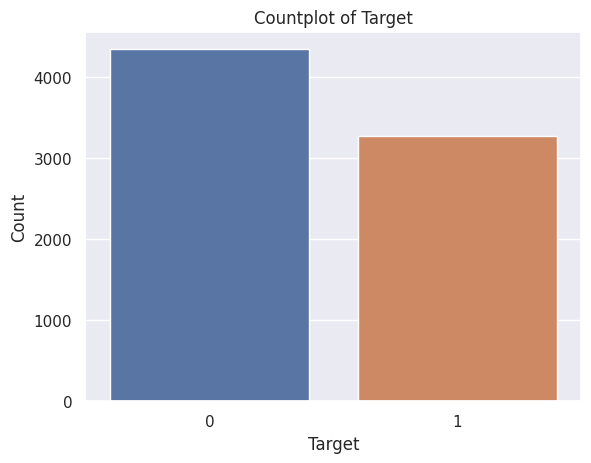

In [ ]:
# Create a Seaborn countplot
sns.set(style="darkgrid")

# Specify the data and column for the countplot
sns.countplot(data=tweets_train, x='target')

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Countplot of Target')

# Show the plot
plt.show()

**Analysis**: From the summary data provided in the describe() method and the above countplot, we can say that the number of non-disaster tweets are greater than the numnber of disaster related tweets. Therefore, we can say that on average, a tweet does not tend to indicate a disaster.

## 3. Text Pre-processing

In this data pre-processing section, we will execute a series of text transformations and preparations to make the dataset model-ready. These steps include:

1. **Lowercasing:** Transforming all text in the relevant column to lowercase to ensure uniformity.

2. **Punctuation and Number Removal:** Eliminating punctuation marks and numeric characters from the text, retaining only the textual content.

3. **Tokenization:** Breaking down the text into individual words or tokens for further processing.

4. **Stopword Removal:** Filtering out common stopwords from the tokenized text, enhancing the relevance of the data.

5. **Lemmatization:** Applying lemmatization to the tokens to reduce words to their base or dictionary form.

6. **Text Integration:** Reconstructing the lemmatized tokens into coherent sentences and creating a new column named "final" to hold the processed text.

These steps collectively ensure that the dataset is prepared for effective use in the classification model, with the text content in an optimized and consistent format.







In [ ]:
# Create a new column in the dataframe.
# All of the text pre-processing will be done to this column
tweets_train['final'] = tweets_train['text']

# # Fix hyperlinks to have only https
# # Create a function to fix the hyperlinks
# def fix_link(text):
#   return re.sub(r'https?://\S+|www\.\S+', ' ', text)
# # Apply this function to all values in the Final column
# tweets_train['final'] = tweets_train['final'].apply(fix_link)

# Lowercase all text in Final
tweets_train['final'] = tweets_train['final'].apply(str.lower)

# Remove punctuations and numbers from all text in Final
# Create a function to remove punctuations and numbers from a sentence
def rem_punc_num(text):
  return re.sub(r'[^a-zA-Z]', ' ', text)
# Apply this function to all values in the Final column
tweets_train['final'] = tweets_train['final'].apply(rem_punc_num)

# Tokenize all words from all text in Final
# Create a function to tokenize words of a sentence
def tokenize(text):
  return word_tokenize(text)
# Apply this function to all values in the Final column
tweets_train['final'] = tweets_train['final'].apply(tokenize)

# Remove all stopwords in Final
# Get all the English stopwords
stop_words = set(stopwords.words('english'))
stop_words.remove("not")
# Create a function to remove stopwords from the of tokenized sentence
def rem_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]
# Apply this function to all values in the Final column
tweets_train['final'] = tweets_train['final'].apply(rem_stopwords)

# Lemmatize all tokenized words in Final
# Initialie the lemmatizer
wnl = WordNetLemmatizer()
# Create a function to lemmatize words from the tokenized sentence
def lemmatize(tokens):
  return [wnl.lemmatize(word, pos='v') for word in tokens]

# Apply this function to all values in the Final column
tweets_train['final'] = tweets_train['final'].apply(lemmatize)

# Join the lemmatized words into a sentence in Final
# Create a function to join the lemmatized words of a tokenized sentence
def word_join(tokens):
  return ' '.join(tokens)

# Apply this function to all values in the Final column
tweets_train['final'] = tweets_train['final'].apply(word_join)

# Print dataset
tweets_train.head()

<ipython-input-10-bef73e5a14c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_train['final'] = tweets_train['text']
<ipython-input-10-bef73e5a14c6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_train['final'] = tweets_train['final'].apply(str.lower)
<ipython-input-10-bef73e5a14c6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,text,target,final
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents ask shelter place notify officer eva...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation order cali...
4,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfires pou...


In [ ]:
tweets_train['final'].values

array(['deeds reason earthquake may allah forgive us',
       'forest fire near la ronge sask canada',
       'residents ask shelter place notify officer evacuation shelter place order expect',
       ..., 'utc km volcano hawaii http co zdtoyd ebj',
       'police investigate e bike collide car little portugal e bike rider suffer serious non life threaten injuries',
       'latest home raze northern california wildfire abc news http co ymy rskq'],
      dtype=object)

## 4. Visualization with WordCloud


In this section, I will perform a WordCloud visualization to contrast the language used in tweets that strongly suggest a "disaster" and those that are unrelated to disasters. This analysis involves splitting the dataset into two distinct subsets: one comprising tweets that clearly indicate a disaster, and the other encompassing tweets that are unrelated to disasters. Subsequently, I will create WordCloud visualizations for each subset to illustrate the distinctive vocabulary and language patterns employed in these different contexts. This process will provide valuable insights into the textual characteristics of disaster-related and non-disaster-related tweets.

In [ ]:
# Split the datasets into disaster and non-disaster datasets
disaster_tweets = tweets_train[tweets_train['target'] == 1]
non_disaster_tweets = tweets_train[tweets_train['target'] == 0]

# Create a string with all disaster text
disaster_text = ' '.join(disaster_tweets['final'])
non_disaster_text = ' '.join(non_disaster_tweets['final'])

In [ ]:
# initialize WordCloud instances for disaster and non-disaster tweets
disaster = WordCloud(max_words=50, stopwords=stop_words, random_state=37, background_color='white', collocations=False, colormap='viridis').generate(disaster_text)
non_disaster = WordCloud(max_words=50, stopwords=stop_words, random_state=38, background_color='white', collocations=False, colormap='viridis').generate(non_disaster_text)

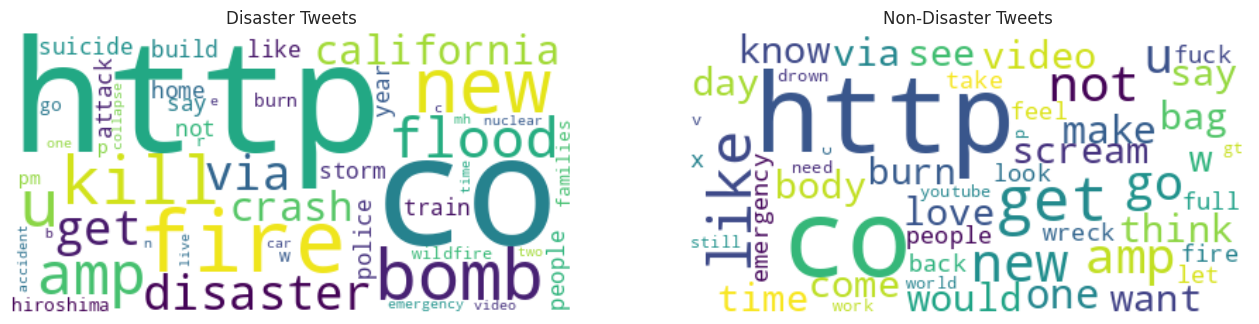

In [ ]:
# Display the word clouds using Matplotlib
# Create a Matplotlib figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first WordCloud in the first subplot
axs[0].imshow(disaster, interpolation='bilinear')
axs[0].set_title('Disaster Tweets')
axs[0].axis('off')

# Plot the second WordCloud in the second subplot
axs[1].imshow(non_disaster, interpolation='bilinear')
axs[1].set_title('Non-Disaster Tweets')
axs[1].axis('off')

# Show the plot
plt.show()

**Analysis**: On the left we have the word cloud visualization for disaster related tweets, and the word cloud visualizatin for non-disaster related tweets. There is a clear difference between the usage of words between the two word clouds.

On the left side, we have words such as fire, disaster, burning, police, suicide, crash, and so on that are more common than other words. However on the other hand, the word cloud on the right side has a lot of varied words which is a stark difference from the right word cloud.

### **Note:**
Before the modeling process, the dataset needs to be split into features ($X$) and label ($y$). Furthermore, the dataset needs to be split into the training set and the testing set.


In [ ]:
# Get the features (x) and label (y)
X = tweets_train['final']
y = tweets_train['target']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
# Initiate the values for the Vectorization and Embedding layer
max_tokens = 7500
output_sequence_length = 128
output_dim = 128

In [ ]:
# Create the vectorizer layer and adapt it to the training data
vectorize_layer = TextVectorization(max_tokens=max_tokens, output_mode="int", standardize="lower", output_sequence_length=output_sequence_length, ngrams=(1,2))
vectorize_layer.adapt(X_train)

In [ ]:
# Create the Embedding layer
embedding_layer = Embedding(input_dim=max_tokens, output_dim=output_dim, input_length=output_sequence_length)

## 5. Building a simple / shallow Neural Network

In this section, I will construct a streamlined neural network architecture, comprising the following sequential components:

1. **Vectorization Layer:** This initial layer will facilitate the transformation of textual data into numerical format, allowing the neural network to process the text efficiently.

2. **Embedding Layer:** Subsequently, an embedding layer will be incorporated, enabling the network to capture semantic relationships and context within the textual data, a crucial aspect in NLP tasks.

3. **Feed-Forward ReLU Activation Layer:** Following the embedding layer, a simple feed-forward layer employing the Rectified Linear Unit (ReLU) activation function will be integrated.

4. **Sigmoid Output Layer:** Finally, a sigmoid output layer will be added, facilitating the binary classification task by providing probabilistic outputs that indicate whether a tweet is related to a real disaster (1) or not (0).

This neural network architecture is deliberately kept shallow to serve as an initial baseline model, allowing for further model refinement and experimentation in subsequent phases of the project.

In [ ]:
# Instantiate the model and add the layers
simple_layers = [
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    embedding_layer,
    Dense(16, activation="elu"),
    Dense(1, activation="sigmoid")
]
simple_model = Sequential(simple_layers)
opt = Adam(learning_rate=0.01)
# Compile the model
simple_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
# Train the model
simple_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
191/191 [==============================] - 46s 191ms/step - loss: 0.6762 - accuracy: 0.5873
Epoch 2/10
191/191 [==============================] - 10s 50ms/step - loss: 0.6682 - accuracy: 0.5941
Epoch 3/10
191/191 [==============================] - 4s 23ms/step - loss: 0.6670 - accuracy: 0.5945
Epoch 4/10
191/191 [==============================] - 4s 19ms/step - loss: 0.6655 - accuracy: 0.5950
Epoch 5/10
191/191 [==============================] - 5s 25ms/step - loss: 0.6650 - accuracy: 0.5949
Epoch 6/10
191/191 [==============================] - 2s 9ms/step - loss: 0.6644 - accuracy: 0.5952
Epoch 7/10
191/191 [==============================] - 2s 10ms/step - loss: 0.6643 - accuracy: 0.5954
Epoch 8/10
191/191 [==============================] - 2s 11ms/step - loss: 0.6637 - accuracy: 0.5955
Epoch 9/10
191/191 [==============================] - 1s 7ms/step - loss: 0.6648 - accuracy: 0.5952
Epoch 10/10
191/191 [==============================] - 2s 9ms/step - loss: 0.6662 - accura

In [ ]:
# Test the model
test_loss, test_acc = simple_model.evaluate(X_test, y_test)

print(f'Testing Loss: {test_loss:.2f}')
print(f'Testing Acc: {test_acc * 100:.2f}%')

48/48 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.5753
Testing Loss: 0.68
Testing Acc: 57.53%


**Observation:** In this section, we have created our first deep learning model for the task. With this model, we have a **58%** accuracy for both the training and testing sets.

While this may be a good accuracy for a first model, this model cannot be used for prediction, as it is only slightly better than random selection. We observe that this model did not achieved a great result. We'll observe the performance in the other models we'll build.

## 6. Building a Multilayer Deep Text Classification Model

In this section, I will be enhancing the neural network architecture by introducing a GlobalAveragePooling1D layer, incorporating regularization techniques, and implementing dropout layers to bolster the model's robustness. The neural network will be structured as follows:

1. **Vectorization Layer:** To transform the text data into numerical format suitable for deep learning.

2. **Embedding Layer:** To create dense representations of the text data, capturing semantic information.

3. **GlobalAveragePooling1D Layer:** A pooling layer that computes the average of the spatial data along the 1D input, which helps in simplifying and reducing dimensionality.

4. **Feed-Forward Layers (Five Layers):** These layers will form the core of the neural network, performing intricate transformations and feature extraction. Regularization techniques, such as L1 or L2 regularization, will be applied to prevent overfitting. Two dropout layers will be incorporated to improve generalization and prevent co-adaptation of neurons.

5. **Sigmoid Output Layer:** This layer will produce binary classification results, indicating whether a tweet is related to a real disaster or not.

By implementing these architectural enhancements and regularization strategies, the model will be more resilient, ensuring better performance and generalization capabilities during training and evaluation.

In [ ]:
# Instantiate the model and add the layers
multi_layers = [
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    embedding_layer,
    GlobalAveragePooling1D(),
    Dense(16, activation="elu", kernel_regularizer=L1L2(0.005)),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
]
multi_model = Sequential(multi_layers)
opt = RMSprop(learning_rate=0.001, rho=0.8, momentum=0.9)
multi_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])
multi_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
191/191 [==============================] - 25s 119ms/step - loss: 0.7010 - accuracy: 0.7542
Epoch 2/10
191/191 [==============================] - 8s 43ms/step - loss: 0.5186 - accuracy: 0.8361
Epoch 3/10
191/191 [==============================] - 3s 18ms/step - loss: 0.4634 - accuracy: 0.8550
Epoch 4/10
191/191 [==============================] - 3s 18ms/step - loss: 0.4318 - accuracy: 0.8662
Epoch 5/10
191/191 [==============================] - 3s 18ms/step - loss: 0.4233 - accuracy: 0.8681
Epoch 6/10
191/191 [==============================] - 4s 22ms/step - loss: 0.4153 - accuracy: 0.8663
Epoch 7/10
191/191 [==============================] - 3s 18ms/step - loss: 0.3915 - accuracy: 0.8765
Epoch 8/10
191/191 [==============================] - 2s 11ms/step - loss: 0.3872 - accuracy: 0.8767
Epoch 9/10
191/191 [==============================] - 2s 9ms/step - loss: 0.3825 - accuracy: 0.8765
Epoch 10/10
191/191 [==============================] - 2s 9ms/step - loss: 0.3770 - accura

In [ ]:
# Test the model
test_loss, test_acc = multi_model.evaluate(X_test, y_test)

print(f'Testing Loss: {test_loss:.2f}')
print(f'Testing Acc: {test_acc * 100:.2f}%')

48/48 [==============================] - 0s 4ms/step - loss: 0.5649 - accuracy: 0.7846
Testing Loss: 0.56
Testing Acc: 78.46%


**Observation:** In this section, we see a great improvement in the model that we have built as compared to the previous section. Here, we have a **88%** training accuracy and **78%** testing accuracy.  It seemed to have a positive impact on the model performace as the accuracy improved for both training and test set, which is good progress.


## 7. Building a Multi Layer Bidirectional LSTM model


In this section, I will construct an alternative model, building upon the existing vectorization and embedding layers. The central component of this new model will be the Bidirectional Long Short-Term Memory (LSTM), which is known for its ability to capture complex linguistic dependencies and temporal patterns in text data.

Additionally, the Bidirectional LSTM introduces a crucial parameter known as `merge_mode`. This parameter dictates how the multiple inputs of the Bidirectional LSTM will be merged together. To comprehensively explore the model's performance, I will conduct a series of tests involving three distinct `merge_modes`: `sum`, `ave`, and `mul`. By systematically evaluating these `merge modes`, I aim to determine their impact on the model's capacity to capture and utilize bidirectional information effectively, further enhancing the model's predictive capabilities.

### 7.1 Sum merge mode

In [ ]:
# Instantiate the model and add the layers
multi_lstm_layers = [
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    embedding_layer,
    Bidirectional(LSTM(8, return_sequences=True), merge_mode='sum'),
    Bidirectional(LSTM(4)),
    Dense(8, activation="elu"),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
multi_lstm_model = Sequential(multi_lstm_layers)
opt = Adam(learning_rate=0.0005)
multi_lstm_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])
multi_lstm_model.fit(X_train, y_train, epochs=2)

Epoch 1/2
191/191 [==============================] - 34s 128ms/step - loss: 0.5149 - accuracy: 0.8445
Epoch 2/2
191/191 [==============================] - 8s 44ms/step - loss: 0.3459 - accuracy: 0.8941


In [ ]:
# Test the model
test_loss, test_acc = multi_lstm_model.evaluate(X_test, y_test)

print(f'Testing Loss: {test_loss:.2f}')
print(f'Testing Acc: {test_acc * 100:.2f}%')

48/48 [==============================] - 2s 12ms/step - loss: 0.4702 - accuracy: 0.7886
Testing Loss: 0.47
Testing Acc: 78.86%


**Observation**: In this section, we have a **89%** training accuracy and **79%** testing accuracy. We can see a minor change from the previous model.

### 7.2 Average merge mode

In [ ]:
# Instantiate the model and add the layers
multi_lstm_layers = [
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    embedding_layer,
    Bidirectional(LSTM(8, return_sequences=True), merge_mode='ave'),
    Bidirectional(LSTM(4)),
    Dense(8, activation="elu"),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
multi_lstm_model = Sequential(multi_lstm_layers)
opt = Adam(learning_rate=0.0005)
multi_lstm_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])
multi_lstm_model.fit(X_train, y_train, epochs=2)

Epoch 1/2
191/191 [==============================] - 30s 112ms/step - loss: 0.5503 - accuracy: 0.7670
Epoch 2/2
191/191 [==============================] - 11s 57ms/step - loss: 0.3548 - accuracy: 0.8883


In [ ]:
# Test the model
test_loss, test_acc = multi_lstm_model.evaluate(X_test, y_test)

print(f'Testing Loss: {test_loss:.2f}')
print(f'Testing Acc: {test_acc * 100:.2f}%')

48/48 [==============================] - 2s 12ms/step - loss: 0.5092 - accuracy: 0.7728
Testing Loss: 0.51
Testing Acc: 77.28%


**Observation**: In this section, we have a **89%** training accuracy and **77%** testing accuracy. We can see a minor change from the previous model.

### 7.3 Multiplication merge mode

In [ ]:
# Instantiate the model and add the layers
multi_lstm_layers = [
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    embedding_layer,
    Bidirectional(LSTM(8, return_sequences=True), merge_mode='mul'),
    Bidirectional(LSTM(4)),
    Dense(8, activation="elu"),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
multi_lstm_model = Sequential(multi_lstm_layers)
opt = Adam(learning_rate=0.0005)
multi_lstm_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])
multi_lstm_model.fit(X_train, y_train, epochs=2)

Epoch 1/2
191/191 [==============================] - 34s 129ms/step - loss: 0.5375 - accuracy: 0.7544
Epoch 2/2
191/191 [==============================] - 17s 87ms/step - loss: 0.3390 - accuracy: 0.8934


In [ ]:
# Test the model
test_loss, test_acc = multi_lstm_model.evaluate(X_test, y_test)

print(f'Testing Loss: {test_loss:.2f}')
print(f'Testing Acc: {test_acc * 100:.2f}%')

48/48 [==============================] - 2s 12ms/step - loss: 0.5207 - accuracy: 0.7741
Testing Loss: 0.52
Testing Acc: 77.41%


**Observation**: In this section, we have a **89%** training accuracy and **77%** testing accuracy. We can see a minor change from the previous model.

**Final Observation**: We observe that the three merge modes have nearly the same training and test accuracy and that there different `merge_modes` don't have much significance to the model. On average all three `merge_modes` have a **89%** training accuracy and **78%** testing accuracy.

One thing of note is that the `ave` and `mul` `merge_modes` slightly overfit the data than the `sum` `merge_mode`.

## 8. Building a Transformer Model using DistilBERT

In this section, I will introduce a novel approach by integrating a pre-trained transformer model, `DistilBERT`, into the workflow. The primary objective is to leverage the capabilities of `DistilBERT` for text classification. `DistilBERT`, renowned for its compact size and rapid execution, is an efficient Transformer model developed through the distillation of BERT base. Despite its reduced parameter count, it delivers commendable performance, maintaining over 95% of BERT's proficiency, as evidenced by its performance on the GLUE language understanding benchmark.

The distinctive feature of this approach is the capacity to harness the power of transfer learning, enabling the model to comprehend and classify text with a high degree of accuracy and efficiency. By fine-tuning `DistilBERT` on the designated training set, I aim to leverage its pre-trained language representations and apply them effectively to the task of text classification. This approach represents a significant step toward optimizing both model performance and computational efficiency, enhancing the overall quality of the classification system.

In [ ]:
# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
# tokenize the training and testing data for DistilBERT
train_encodings = tokenizer(X_train.tolist(), max_length=128, truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), max_length=128, truncation=True, padding=True)

In [ ]:
# Convert the tokenized data into Tensorflow recognized data, i.e., into a Tensorflow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    tf.constant(y_train, dtype=tf.int32)
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    tf.constant(y_test, dtype=tf.int32)
))

In [ ]:
# Shuffle the training dataset and batch both train and test datasets into chucks of 16.
batch_size = 16
train_dataset = train_dataset.shuffle(len(X_train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [ ]:
# Instantiate the model and train the model
distilbert_model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased')
optimizer = Adam(learning_rate=3e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metrics = SparseCategoricalAccuracy('accuracy')
distilbert_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
distilbert_model.fit(train_dataset, epochs=4, validation_data=test_dataset)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/4
381/381 [==============================] - 80s 131ms/step - loss: 0.4651 - accuracy: 0.7984 - val_loss: 0.4069 - val_accuracy: 0.8162
Epoch 2/4
381/381 [==============================] - 38s 101ms/step - loss: 0.3425 - accuracy: 0.8586 - val_loss: 0.4082 - val_accuracy: 0.8234
Epoch 3/4
381/381 [==============================] - 38s 99ms/step - loss: 0.2327 - accuracy: 0.9090 - val_loss: 0.4827 - val_accuracy: 0.8096
Epoch 4/4
381/381 [==============================] - 37s 98ms/step - loss: 0.1403 - accuracy: 0.9486 - val_loss: 0.5565 - val_accuracy: 0.7997


In [ ]:
# Test the model
test_loss, test_acc = distilbert_model.evaluate(test_dataset)

print(f'Testing Loss: {test_loss:.2f}')
print(f'Testing Acc: {test_acc * 100:.2f}%')

96/96 [==============================] - 4s 37ms/step - loss: 0.5565 - accuracy: 0.7997
Testing Loss: 0.56
Testing Acc: 79.97%


**Observation:** This section has provided with the highest accuracy values for the training and the testing set: **95%** and **80%**, respectively.

## Conclusion

In this project, I undertook the development of a series of deep learning text classification models using TensorFlow, with the objective of predicting whether a given tweet indicated a disaster or not, using a real-world tweets dataset.

The model-building process was marked by a progression from a basic, shallow neural network to more advanced Transformer-based models. The performance of each model variant is summarized as follows:

1. **Shallow Neural Network:** Demonstrated a train and test set accuracy of approximately **58%**.

2. **Multi-layer Deep Text Classification Model:** Achieved a train set accuracy of **88%** and a test set accuracy of **78%**.

3. **Multilayer Bidirectional LSTM Model:** Attained a train set accuracy of **89%** and a test set accuracy of **78%**.

4. **Transformer Model:** Exemplified the highest model performance with a train set accuracy of **95%** and a test set accuracy of **80%**.

Remarkably, the results underscore that the model variants consistently delivered good performance, with the exception of the initial shallow neural network model. Notably, the Transformer model emerged as the top-performing model, showcasing its capacity to capture intricate language patterns and nuances effectively. These findings serve as a testament to the power of deep learning and the potential of advanced models in text classification tasks.





